In [1]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [39]:
dfx = pd.read_csv("Apartment_Factors.csv")
dfy = pd.read_csv("Pets Allowed1.csv")
dfy2 = pd.read_csv("Pets Allowed2.csv")


In [40]:
dfy['Pets Allowed'].value_counts()

Pets Allowed
Cats,Dogs          5228
No Pets Allowed    4163
Cats                485
Dogs                124
Name: count, dtype: int64

In [41]:
dfy2['Pets Allowed'].value_counts()

Pets Allowed
Yes    5837
No     4163
Name: count, dtype: int64

In [42]:
dfy2.head()

,Pets Allowed
0,No
1,No
2,No
3,No
4,No


In [43]:
X = dfx
y = dfy['Pets Allowed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [44]:
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [45]:
y_predicted

array(['Cats,Dogs', 'Cats,Dogs', 'Cats,Dogs', ..., 'Cats,Dogs',
       'Cats,Dogs', 'Cats,Dogs'], dtype=object)

In [46]:
regression.score(X_test, y_test)

0.528

In [47]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, np.float64(0.0), 0.04778325123152709, np.float64(0.0)),
  ('0', '1'): (0.0,
   np.float64(0.0033003300330033004),
   0.04778325123152709,
   np.float64(0.7859548841482086)),
  ('0', '2'): (0.0,
   np.float64(0.7925555442142153),
   0.04778325123152709,
   np.float64(0.0)),
  ('0', '3'): (0.0,
   np.float64(0.7958558742472185),
   0.04778325123152709,
   np.float64(0.2041441257527815)),
  ('1', '0'): (0.052709359605911325,
   np.float64(0.0),
   0.5147783251231526,
   np.float64(0.0)),
  ('1', '1'): (0.052709359605911325,
   np.float64(0.0033003300330033004),
   0.5147783251231526,
   np.float64(0.7295466388744137)),
  ('1', '2'): (0.052709359605911325,
   np.float64(0.7361472989404203),
   0.5147783251231526,
   np.float64(0.0)),
  ('1', '3'): (0.052709359605911325,
   np.float64(0.7394476289734236),
   0.5147783251231526,
   np.float64(0.26055237102657636)),
  ('2', '0'): (0.5724137931034482,
   np.float64(0.0),
   0.012315270935

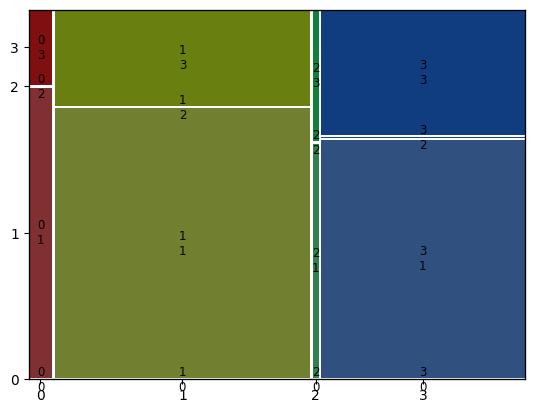

In [48]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

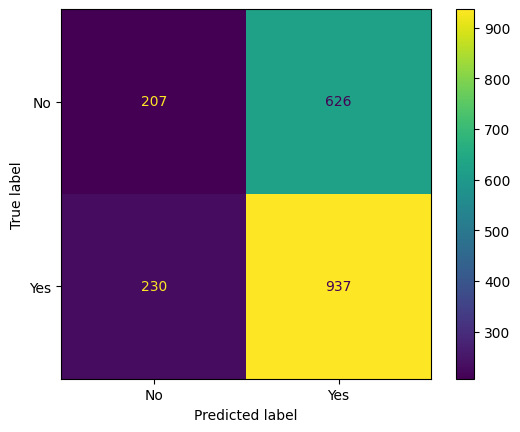

In [54]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [56]:
X = dfx
y = dfy2['Pets Allowed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [58]:
y_predicted

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [59]:
regression.score(X_test, y_test)

0.572

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.41442786069651744,
   np.float64(0.24767382035870825)),
  ('0', '1'): (0.0,
   np.float64(0.25099607949492087),
   0.41442786069651744,
   np.float64(0.749003920505079)),
  ('1', '0'): (0.4194029850746269,
   np.float64(0.0),
   0.5805970149253732,
   np.float64(0.19643177412054078)),
  ('1', '1'): (0.4194029850746269,
   np.float64(0.1997540332567534),
   0.5805970149253732,
   np.float64(0.8002459667432466))})

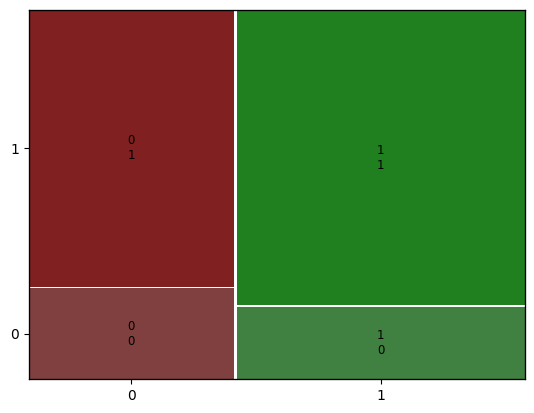

In [60]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

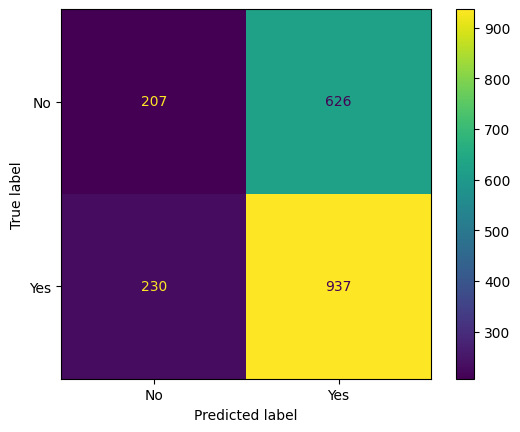

In [61]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)